In [6]:
import os
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from IPython.display import clear_output

from helper_functions import get_issue, get_metrics, get_side, get_projection

%matplotlib inline

In [7]:
DF_PATH = "/Users/dutking/LOCAL/Pathologies_ArtDental_g/Utkin Dmitry/DF_semifinal.csv"
DATA_DIR = "/Users/dutking/Yandex.Disk-dutking.localized/ИИ"

In [8]:
img_data = list(os.walk(DATA_DIR))

In [9]:
df = pd.read_csv(DF_PATH, index_col="id")
df["comment"].fillna("", inplace=True)
df.head(3)

,name,comment,axial.left.anterior,axial.left.posterior,axial.left.medial,axial.left.lateral,axial.right.anterior,axial.right.posterior,axial.right.medial,axial.right.lateral,...,issue.medial.left,issue.medial.right,issue.compression.left,issue.compression.right,issue.distraction.left,issue.distraction.right,issue.distal.left,issue.distal.right,issue.mesial.left,issue.mesial.right
id,,,,,,,,,,,,,,,,,,,,,
1,Останькович В.В.,,-1.0,-1.0,3.1,1.6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
2,Самойлова Е.Г. 29.12.2021,,-1.0,-1.0,1.7,2.3,-1.0,-1.0,2.0,2.3,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
3,Авакимова М.Н.,,-1.0,-1.0,8.4,2.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [10]:
def input_metrics(projection_id):
    data = input(f"Введите метрики {get_metrics(projection_id)} через пробел: ")

    if data == "":
        return None
    try:
        result = list(map(float, data.strip().split(" ")))
    except ValueError:
        print("Необходимо ввести метрики через пробел.")
        return input_metrics(projection_id)
    return result


def set_data(df, user_id, projection_id, side_id, input_data):
    metrics = get_metrics(projection_id)
    for metric, value in zip(metrics, input_data):
        df.loc[user_id, f"{projection_id}.{side_id}.{metric}"] = value


def set_issue(df, user_id, issue_id, side_id):
    if issue_id != "normal":
        df.loc[user_id, f"issue.{issue_id}.{side_id}"] = 1


def set_comment(df, user_id):
    comment = input("Комментарий: ")
    if comment == "":
        return

    if comment.startswith("+"):
        if df.loc[user_id, "comment"]:
            df.loc[user_id, "comment"] += comment[1:]
        else:
            df.loc[user_id, "comment"] = comment[1:]
        return

    df.loc[user_id, "comment"] = comment

In [18]:
bad_ids = [8, 59, 225]

1 Останькович В.В.
К1Ла.jpg: Аксиальная проекция | Латеральное смещение | Слева
Комментарий: 
Текущие значения:
['anterior: -1.0', 'posterior: -1.0', 'medial: 3.1', 'lateral: 1.6']


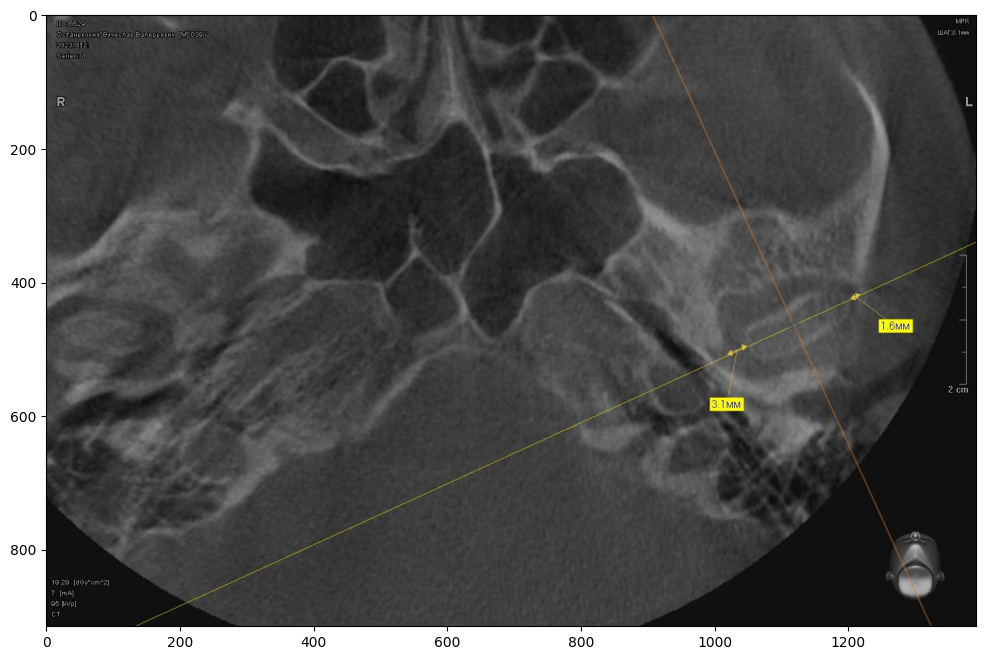

In [11]:
for study_id in df.index:
    if study_id > 0:
        user_name = df.loc[study_id, "name"]
        img_id_1 = f"К{study_id}Л"
        img_id_2 = f"К{study_id}П"
        for root, dirs, files in img_data:
            for file in list(sorted(files)):
                if file.startswith(img_id_1) or file.startswith(img_id_2):
                    projection_name, projection_id = get_projection(root)
                    issue_name, issue_id = get_issue(root)
                    side_name, side_id = get_side(file)
                    metrics = get_metrics(projection_id)
                    print(study_id, user_name)
                    print(
                        f"{file}: {projection_name} проекция | {issue_name} смещение | {side_name}"
                    )
                    print(f"Комментарий: {df.loc[study_id, 'comment']}")
                    print("Текущие значения:")
                    current_metrics = df.loc[
                        study_id,
                        [f"{projection_id}.{side_id}.{metric}" for metric in metrics],
                    ]
                    print([f"{k}: {v}" for (k, v) in zip(metrics, current_metrics)])
                    image = mpimg.imread(os.path.join(root, file))
                    fig = plt.figure(figsize=(12, 12))
                    plt.imshow(image)
                    plt.show()
                    set_issue(df, study_id, issue_id, side_id)
                    data = input_metrics(projection_id)
                    if data is not None:
                        set_data(df, study_id, projection_id, side_id, data)
                    set_comment(df, study_id)
                    df.to_csv("DF_semifinal.csv")
                    clear_output(wait=True)